In [136]:
import bs4

## 증권 뉴스 크롤링 및 자연어처리 프로젝트

## 주제 : 주식종목 뉴스 크롤링

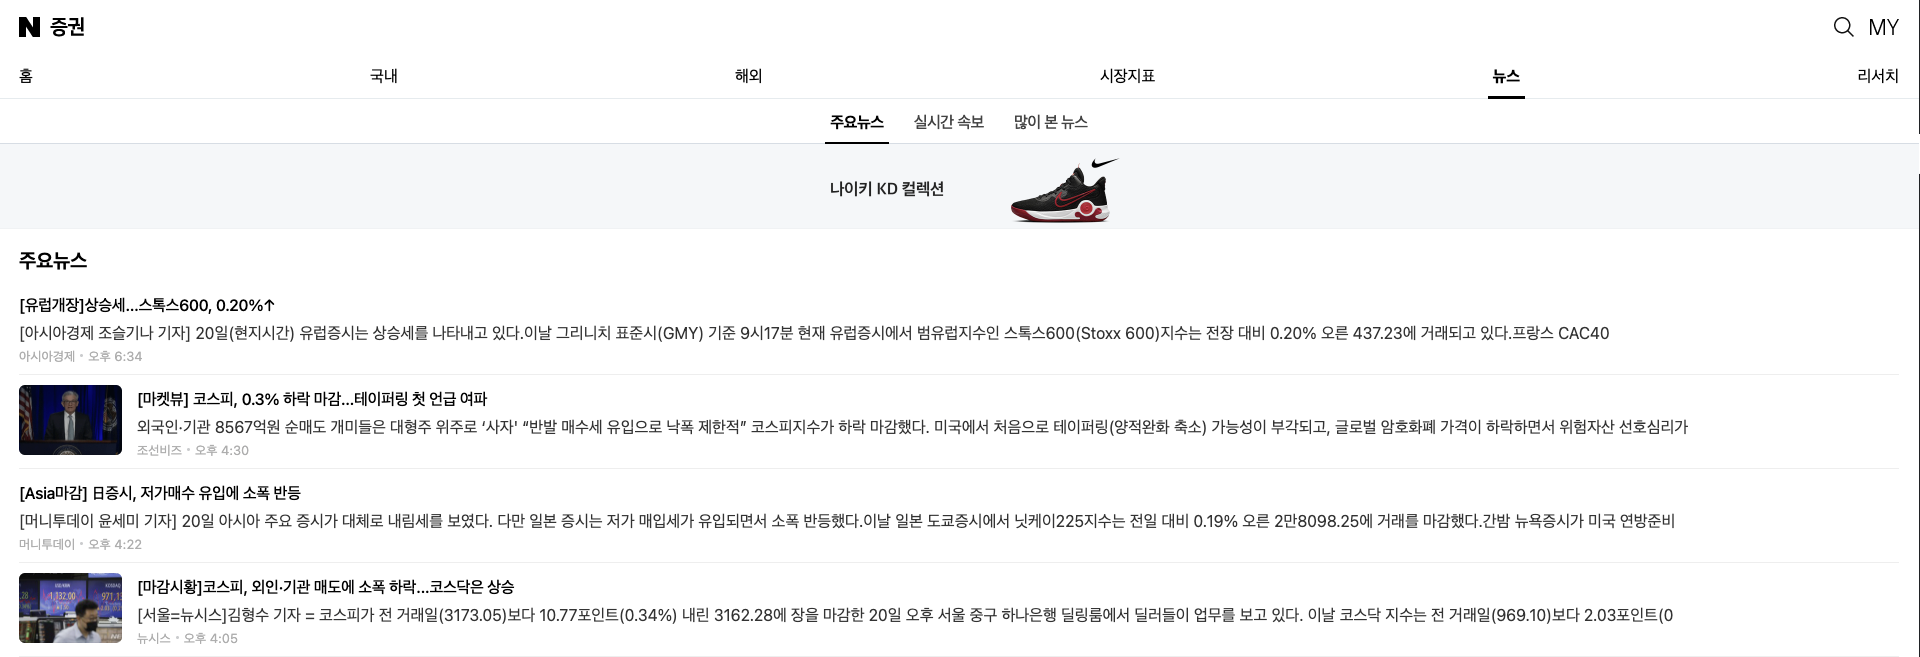


## 목차

- 1. 크롤링 계획
    - 1.주가 데이터 크롤링
    - 2.네이버 증권탭 종목별 뉴스 크롤링
    

- 2. 자연어 처리 프로젝트
    - 1. konlpy를 활용한 주식뉴스 타이틀 워드클라우드
    - 2. 나이브베이즈를 활용한 주식뉴스 감성분석
    - 3. Word2vec을 활용한 주식 키워드 유사도분석


## 크롤링 계획
### 1. 주식 데이터 크롤링
- 상장된 주식 전 종목 일자별 크롤링
- 컬럼 : 종목코드 / 종목이름 / 일자 / 종가 / 시장구분(코스닥 + 코스피)
- 기간 : 현시점부터 1년
- 크롤링 할 사이트 : http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020101
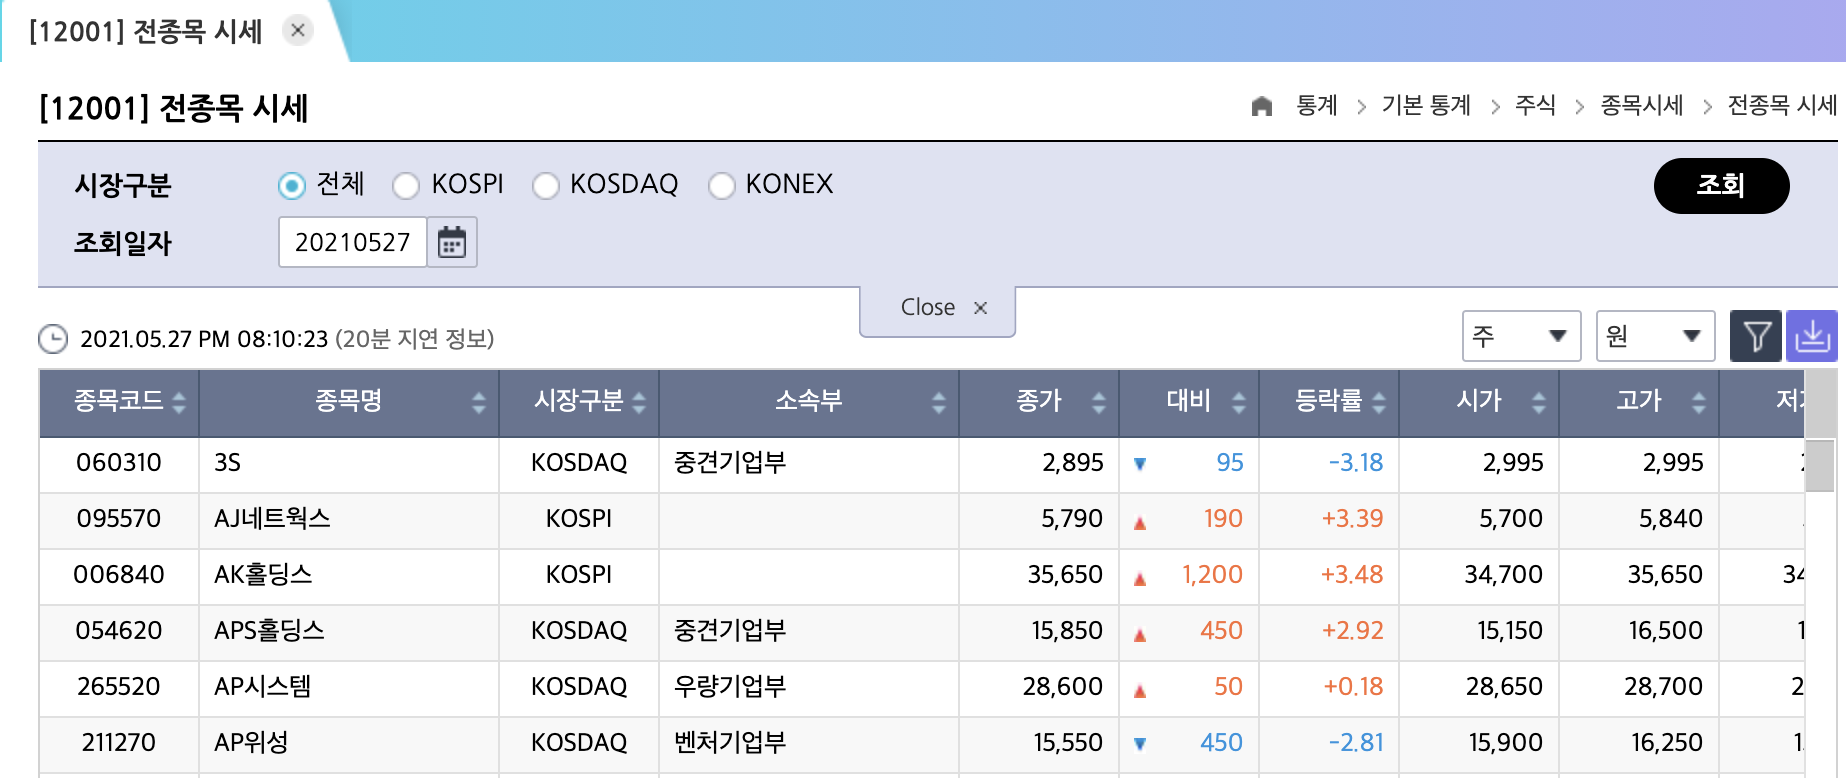

## 크롤링 계획 

### 2. 주식관련 뉴스 크롤링
- 네이버 / 다음 증권 국내증시탭에서 상장기업 뉴스 크롤링

![image.png](attachment:image.png)

- 종목코드를 url에 대입하여 상장된 모든 기업의 뉴스,공시를 크롤링할 예정
- 네이버 및 다음의 뉴스 공시는 일년을 기준으로 업데이트됨.
- 해당 이슈가 발생할 날짜를 주가와 연계하기 위해서 뉴스가 발행된 날짜를 함께 크롤링
- 종목/주가데이터셋과 합치는데 종목코드를 활용할 예정

In [2]:
dates = pd.date_range("20210520", "20210520")

dfs = []

for date in dates:
    print(date, end=" ")
    date = str(date).split(" ")[0].replace("-", "")
    url = "http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd"
    params = {
        "bld": "dbms/MDC/STAT/standard/MDCSTAT01501",
        "mktId": "ALL",
        "trdDd": date,
        "share": "1",
        "money": "1",
        "csvxls_isNo": "false",
    }
    response = requests.post(url, params)
    datas = response.json()["OutBlock_1"]
    df = pd.DataFrame(datas)
    df["DATE"] = date
    dfs.append(df)
    time.sleep(1)

result_df = pd.concat(dfs)
result_df.reset_index(inplace=True)
result_df.tail()

2021-05-20 00:00:00 

,index,ISU_SRT_CD,ISU_ABBRV,MKT_NM,SECT_TP_NM,TDD_CLSPRC,FLUC_TP_CD,CMPPREVDD_PRC,FLUC_RT,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,ACC_TRDVOL,ACC_TRDVAL,MKTCAP,LIST_SHRS,MKT_ID,DATE
2557,2557,000547,흥국화재2우B,KOSPI,,"36,900",2,"-2,100",-5.38,"37,750","37,750","33,800","19,387","706,174,800","5,667,840,000","153,600",STK,20210520
2558,2558,000545,흥국화재우,KOSPI,,"12,500",2,-200,-1.57,"12,350","12,550","12,350","25,713","319,516,600","9,600,000,000","768,000",STK,20210520
2559,2559,003280,흥아해운,KOSPI,,258,0,0,0.00,0,0,0,0,0,"30,117,000,222","116,732,559",STK,20210520
2560,2560,037440,희림,KOSDAQ,중견기업부,"8,660",2,-20,-0.23,"8,530","8,850","8,530","661,962","5,756,874,230","120,568,633,500","13,922,475",KSQ,20210520
2561,2561,238490,힘스,KOSDAQ,우량기업부,"10,750",2,-50,-0.46,"10,700","10,850","10,600","82,058","881,284,500","121,606,537,000","11,312,236",KSQ,20210520


In [3]:
result_df.to_csv("/Users/jungjihoon/Desktop/주식코드.csv")

In [4]:
주식코드_ls = list(result_df["ISU_SRT_CD"])

In [5]:
주식코드_ls

['060310',
 '095570',
 '006840',
 '054620',
 '265520',
 '211270',
 '027410',
 '282330',
 '138930',
 '001460',
 '001465',
 '001040',
 '079160',
 '035760',
 '00104K',
 '000120',
 '011150',
 '011155',
 '001045',
 '097950',
 '097955',
 '051500',
 '058820',
 '023460',
 '056000',
 '065770',
 '083660',
 '000590',
 '012030',
 '367340',
 '367360',
 '016610',
 '005830',
 '000990',
 '000995',
 '139130',
 '001530',
 '000210',
 '001880',
 '000215',
 '375500',
 '37550K',
 '068790',
 '004840',
 '241520',
 '155660',
 '069730',
 '017940',
 '245620',
 '037370',
 '278990',
 '079190',
 '365550',
 '050120',
 '007700',
 '130500',
 '114090',
 '900290',
 '078930',
 '083450',
 '006360',
 '001250',
 '007070',
 '078935',
 '028150',
 '045890',
 '078150',
 '012630',
 '039570',
 '089470',
 '294870',
 '011200',
 '036640',
 '082740',
 '335870',
 '351340',
 '351320',
 '373200',
 '003560',
 '095340',
 '099520',
 '175330',
 '950170',
 '234080',
 '067290',
 '001060',
 '001067',
 '001065',
 '096760',
 '035900',
 '024840',

In [146]:
import requests
from scrapy.http import TextResponse

In [190]:
url = "https://finance.naver.com/item/news_news.nhn?code=005930&page=&sm=title_entity_id.basic&clusterId="
req = requests.get(url)
response = TextResponse(req.url, body=req.text, encoding="utf-8")
response

<200 https://finance.naver.com/item/news_news.nhn?code=005930&page=&sm=title_entity_id.basic&clusterId=>

In [192]:
response.text

'<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>네이버 금융</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210526011704/css/newstock.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210526011704/css/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210526011704/css/layout.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210526011704/css/main.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210526011704/css/newstock2.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210526011704/css/newstock3.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210526011704/css/world.css">\n</head>\n<body>\n<script t

In [183]:
bs

<!--  global include --><html lang="ko">
<head>
<title>삼성전자 : 네이버 금융</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="네이버 금융" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="https://finance.naver.com" property="og:url"/>
<meta content="국내 해외 증시 지수, 시장지표, 펀드, 뉴스, 증권사 리서치 등 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버금융" property="og:article:author"/>
<meta content="http://FINANCE.NAVER.COM" property="og:article:author:url"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20210526011704/css/finance_header.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20210526011704/css/n

In [151]:
url = "https://finance.naver.com/item/news.nhn?code=005930"
headers = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36',
    'referer': 'https://finance.daum.net/quotes/A005930',
}
req = requests.get(url, headers=headers)
response = TextResponse(req.url, body=req.text, encoding="utf-8")
response

<200 https://finance.daum.net/content/news?page=1&perPage=20&category=economy&searchType=all&keyword=A005930&pagination=true>